In [1]:
# Dependencies and Setup
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime

# Read in your csv files
# Datasets from https://www.kaggle.com/datasets/fivethirtyeight/uber-pickups-in-new-york-city?select=uber-raw-data-janjune-15.csv
uber_apr = pd.read_csv("Resources/uber-raw-data-apr14.csv")
uber_aug = pd.read_csv("Resources/uber-raw-data-aug14.csv")
uber_jul = pd.read_csv("Resources/uber-raw-data-jul14.csv")
uber_jun = pd.read_csv("Resources/uber-raw-data-jun14.csv")
uber_may = pd.read_csv("Resources/uber-raw-data-may14.csv")
uber_sep = pd.read_csv("Resources/uber-raw-data-sep14.csv")

In [2]:
# Print .head()
uber_apr.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
# Check to see if there are any 'null' values and check data types
uber_apr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [4]:
# Renaming the date column
uber_apr.rename({'Date/Time':'Date'}, axis=1, inplace=True)

uber_apr['Date'] = pd.to_datetime(uber_apr['Date'])

# Create new columns to hold different time variables
uber_apr['Month'] = uber_apr['Date'].dt.month_name().str[:3] 

uber_apr['Day'] = uber_apr['Date'].dt.day_name().str[:3]

uber_apr['Hour'] = uber_apr['Date'].dt.hour

uber_apr.head()

,Date,Lat,Lon,Base,Month,Day,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Apr,Tue,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Apr,Tue,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Apr,Tue,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Apr,Tue,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Apr,Tue,0


In [5]:
# Create a new column to store this new binned column with 15 minute intervals
uber_apr['BinnedHour'] = uber_apr['Date'].dt.floor('15min')

In [6]:
# Print the new column
uber_apr['BinnedHour']

0        2014-04-01 00:00:00
1        2014-04-01 00:15:00
2        2014-04-01 00:15:00
3        2014-04-01 00:15:00
4        2014-04-01 00:30:00
                 ...        
564511   2014-04-30 23:15:00
564512   2014-04-30 23:15:00
564513   2014-04-30 23:30:00
564514   2014-04-30 23:30:00
564515   2014-04-30 23:45:00
Name: BinnedHour, Length: 564516, dtype: datetime64[ns]

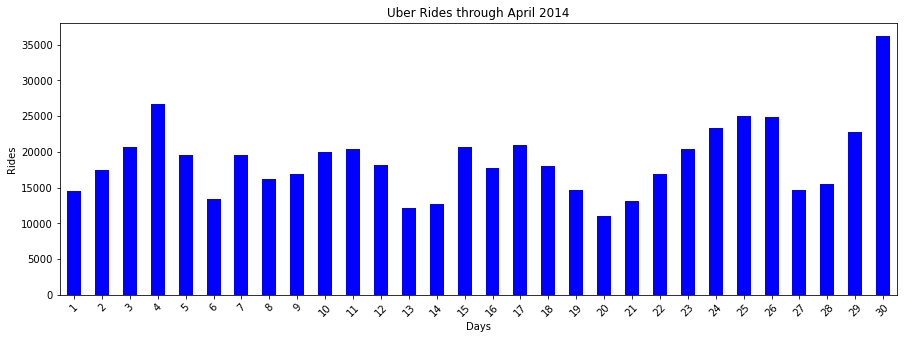

In [7]:
# Plot total April Uber rides by 'Days'
plt.figure(figsize=(15,5))

uber_apr['BinnedHour'].dt.day.value_counts().sort_index().plot(kind='bar',color='blue')

for item in plt.gca().get_xticklabels():
    
    item.set_rotation(45)

    plt.title('Uber Rides through April 2014')

    plt.xlabel('Days')

    plt.ylabel('Rides')

In [8]:
# Print May .head()
uber_may.head()

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512


In [9]:
# Check to see if there are any 'null' values and check data types
uber_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652435 entries, 0 to 652434
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  652435 non-null  object 
 1   Lat        652435 non-null  float64
 2   Lon        652435 non-null  float64
 3   Base       652435 non-null  object 
dtypes: float64(2), object(2)
memory usage: 19.9+ MB


In [10]:
# Renaming the date column
uber_may.rename({'Date/Time':'Date'}, axis=1, inplace=True)

uber_may['Date'] = pd.to_datetime(uber_may['Date'])

# Create new columns to hold different time variables
uber_may['Month'] = uber_may['Date'].dt.month_name().str[:3] 

uber_may['Day'] = uber_may['Date'].dt.day_name().str[:3]

uber_may['Hour'] = uber_may['Date'].dt.hour

uber_may.head()

,Date,Lat,Lon,Base,Month,Day,Hour
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512,May,Thu,0
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512,May,Thu,0
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512,May,Thu,0
3,2014-05-01 00:17:00,40.7463,-74.0011,B02512,May,Thu,0
4,2014-05-01 00:17:00,40.7594,-73.9734,B02512,May,Thu,0


In [11]:
# Create a new column to store this new binned column with 15 minute intervals
uber_may['BinnedHour'] = uber_may['Date'].dt.floor('15min')

In [12]:
# Print the new column
uber_may['BinnedHour']

0        2014-05-01 00:00:00
1        2014-05-01 00:00:00
2        2014-05-01 00:15:00
3        2014-05-01 00:15:00
4        2014-05-01 00:15:00
                 ...        
652430   2014-05-31 23:45:00
652431   2014-05-31 23:45:00
652432   2014-05-31 23:45:00
652433   2014-05-31 23:45:00
652434   2014-05-31 23:45:00
Name: BinnedHour, Length: 652435, dtype: datetime64[ns]

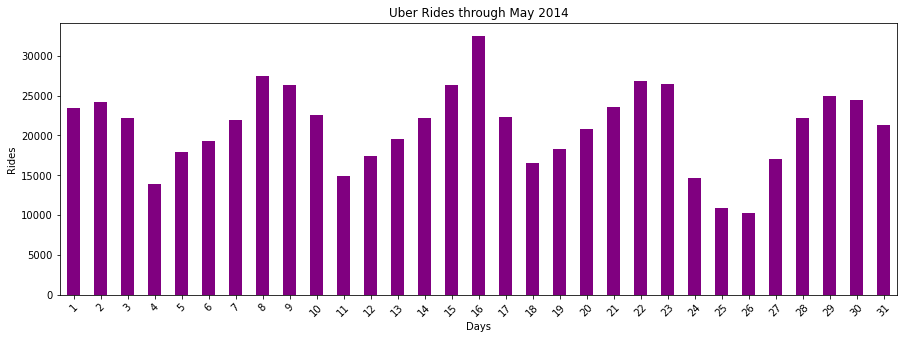

In [13]:
# Plot total May Uber rides by 'Days'
plt.figure(figsize=(15,5))

uber_may['BinnedHour'].dt.day.value_counts().sort_index().plot(kind='bar',color='purple')

for item in plt.gca().get_xticklabels():
    
    item.set_rotation(45)

    plt.title('Uber Rides through May 2014')

    plt.xlabel('Days')

    plt.ylabel('Rides')